# **ORIE5300  /  Assignment 8      /   lc2234**

## Question 2

x0: -5.573173378808942, y0: -7.209723170005679
-----------------------------------
L: 10, Factor: 1, Alpha: 0.1
-----------------------------------
x_0,y_0,alpha,grad_0,grad_x,grad_y
-5.573173378808942 -7.209723170005679 0.1 -5.573173378808942 -5.573173378808942 -72.0972317000568
L           1.000e+01
Factor      1.000e+00
alpha       1.000e-01
x*        -1.976e-323
y*          0.000e+00
f*(x,y)     0.000e+00
k           7.501e+03
log_f            -inf
Name: 7500, dtype: float64
-----------------------------------
L: 10, Factor: 0.1, Alpha: 0.01
-----------------------------------
x_0,y_0,alpha,grad_0,grad_x,grad_y
-5.573173378808942 -7.209723170005679 0.01 -5.573173378808942 -5.573173378808942 -72.0972317000568
L           1.000e+01
Factor      1.000e-01
alpha       1.000e-02
x*         -1.013e-32
y*        -1.976e-323
f*(x,y)     5.133e-65
k           7.501e+03
log_f      -1.480e+02
Name: 7500, dtype: float64
-----------------------------------
L: 10, Factor: 0.01, Alpha: 0.001
-----

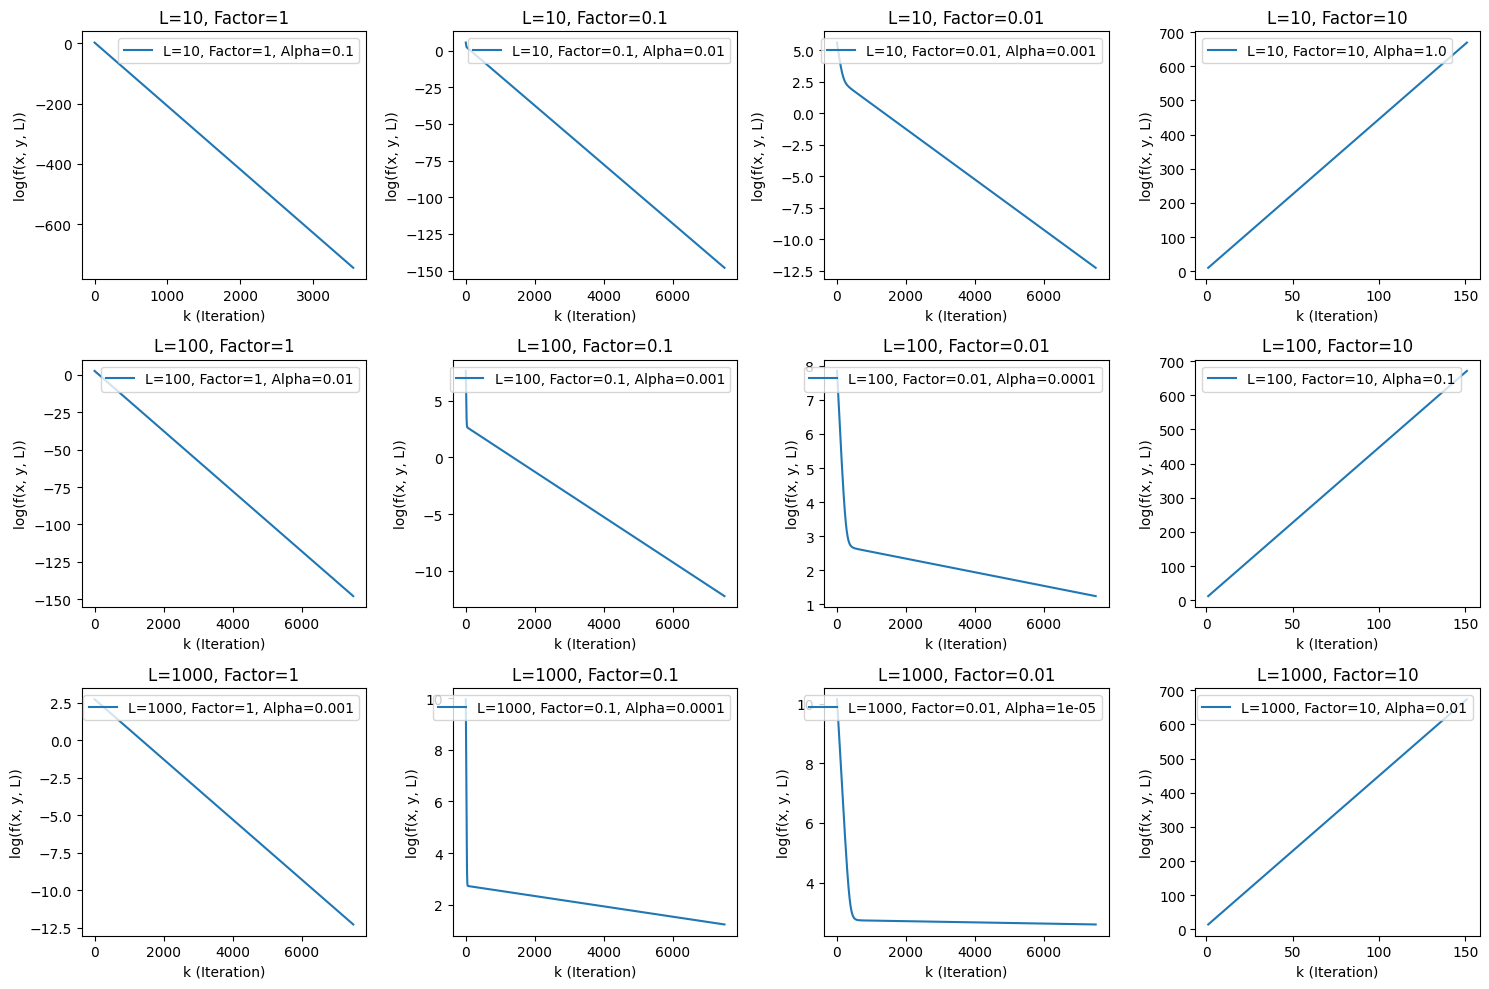

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import pandas as pd

#Supress future warnings related to pandas dataframe.append
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the function to be minimized (a simple quadratic function)
def f(x, y, L):
    return 1/2 * (x**2 +  L * y**2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y,L):
    return x
    # -2**(-L*y**2 - x**2 + 1) * x * np.log(2)

def df_dy(x, y, L):
    return L*y
    # -2**(-L*y**2 - x**2 + 1) * L * y * np.log(2)

# Define the gradient descent algorithm
def gradient_descent(x_0, y_0, L, factor, epsilon, k_max):
    # Initialize the parameters
    x = x_0
    y = y_0
    # history = []
    alpha = factor/L
    k = 0

    if factor == 10: #To avoid overflow errors
      k_max = 150

    grad_0 = df_dx(x_0, y_0, L)
    grad_x = df_dx(x, y, L)
    grad_y = df_dy(x, y, L)

    print('-----------------------------------')
    print('L: %s, Factor: %s, Alpha: %s' %(L, factor, alpha))
    print('-----------------------------------')

    print('x_0,y_0,alpha,grad_0,grad_x,grad_y')
    print(x,y,alpha, grad_0, grad_x, grad_y)

    norm = np.linalg.norm([grad_x, grad_y])

    # Create an empty DataFrame to store the iteration information
    columns = ['L', 'Factor', 'alpha', 'x*', 'y*', 'f*(x,y)','k', 'log_f']
    df = pd.DataFrame(columns=columns)

    # Perform the gradient descent iterations
    while k <= k_max :
        # Calculate the gradients
        grad_x = df_dx(x, y, L)
        grad_y = df_dy(x, y, L)

        # Update the parameters
        x = x - alpha * grad_x
        y = y - alpha * grad_y

        k += 1
        norm = np.linalg.norm([grad_x, grad_y])

        # Save the history of the parameters
        # history.append((L, factor, alpha, x, y, f(x, y, L), k))

        df = df.append({'L':L, 'Factor': factor, 'alpha': alpha, 'x*': x, 'y*': y, 'f*(x,y)': f(x, y, L), 'k': k, 'log_f': np.log(f(x, y, L))}, ignore_index=True)

    return df



# Define the meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.01)
y_range = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(x_range, y_range)
L = [10, 100, 1000]
factors = [1, 0.1, 0.01, 10]

Z_10 = f(X, Y, 10)
Z_100 = f(X, Y, 100)
Z_1000 = f(X, Y, 1000)

# Perform gradient descent and plot the results
start_x, start_y = np.random.uniform(-10, 10), np.random.uniform(-10, 10)
print('x0: %s, y0: %s' % (start_x,start_y))
alpha = 0.1
epsilon = 10 ** (-3)
k_max = 7500

fig, axes = plt.subplots(len(L), len(factors), figsize=(15, 10))

np.seterr(divide = 'ignore')

for i, L in enumerate(L):
  for j, factor in enumerate(factors):
    df = gradient_descent(start_x, start_y, L, factor, epsilon, k_max)

    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
      print(df.iloc[-1])


    # Plot k against log(f(x, y, L))
    ax = axes[i, j]
    ax.plot(df['k'], df['log_f'], label=f'L={L}, Factor={factor}, Alpha={factor/L}')
    ax.set_xlabel('k (Iteration)')
    ax.set_ylabel('log(f(x, y, L))')
    ax.set_title(f'L={L}, Factor={factor}')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

np.seterr(divide = 'warn')


We can observe that there is divergence when $Factor = 10$ and convergence in all other cases.

## Question 3

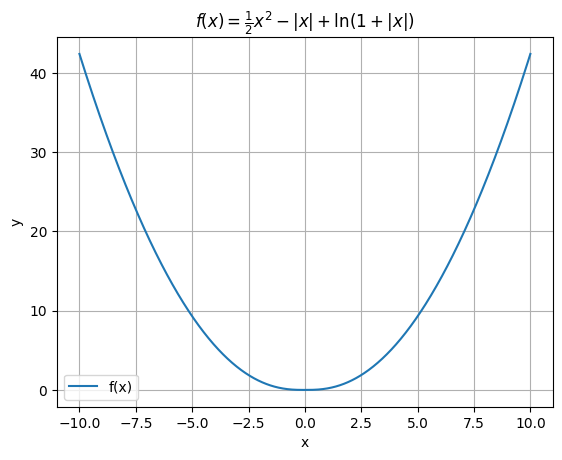

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the function
def my_function(x):
    return 0.5 * x**2 - abs(x) + np.log(1 + abs(x))

# Generate x values
x_values = np.linspace(-10, 10, 1000)

# Calculate corresponding y values
y_values = my_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label=r'f(x)')
plt.title(label=r'$f(x)=\frac{1}{2}x^2 - |x| + \ln(1+|x|)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### Plotting rate of convergence

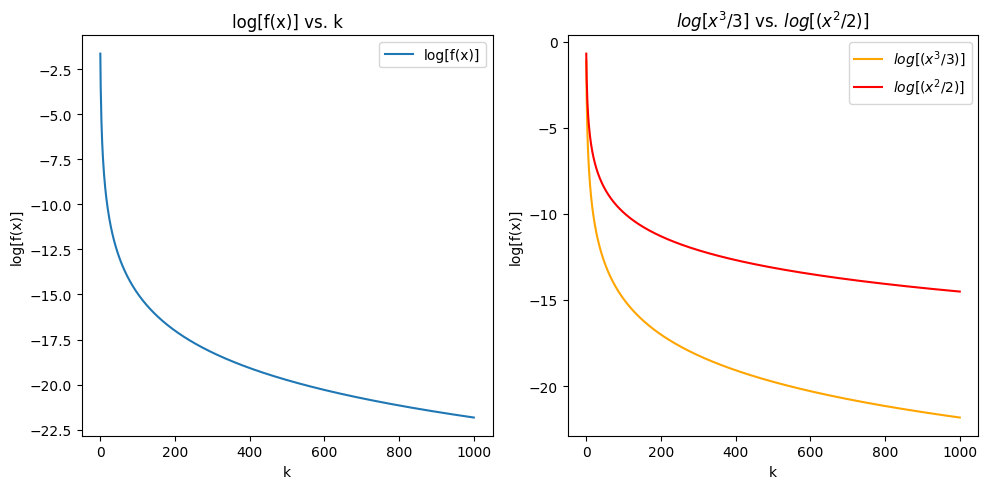

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Function definitions
def f(x):
    return 0.5 * x**2 - abs(x) + np.log(1 + abs(x))

def f_3(x):
    return x**3 / 3

def f_Q2(x):
    return x**2 / 2

# Generate x using recursion x = 1 / (k + 1) for k = 0 to 1000
n = np.arange(0, 1001)

# Calculate f(x) for each x
f_values = [f(1 / (k + 1)) for k in n]
f_cube = [f_3(1 / (k + 1)) for k in n]
f_Q2 = [f_Q2(1 / (k + 1)) for k in n]


# Calculate log(f(x)) for each f(x)
log_f_values = np.log(f_values)
log_f3_values = np.log(f_cube)
log_f_Q2_values = np.log(f_Q2)

# Plot log(f(x)) against k in two subplots
plt.figure(figsize=(10, 5))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(n, log_f_values, label='log[f(x)]')
plt.xlabel('k')
plt.ylabel('log[f(x)]')
plt.title('log[f(x)] vs. k')
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(n, log_f3_values, label='$log[(x^3/3)]$', color='orange')
plt.plot(n, log_f_Q2_values, label='$log[(x^2/2)]$', color='red')
plt.xlabel('k')
plt.ylabel('log[f(x)]')
plt.title('$log[x^3/3]$ vs. $log[(x^2/2)]$')
plt.legend()

plt.tight_layout()
plt.show()


## Question 4

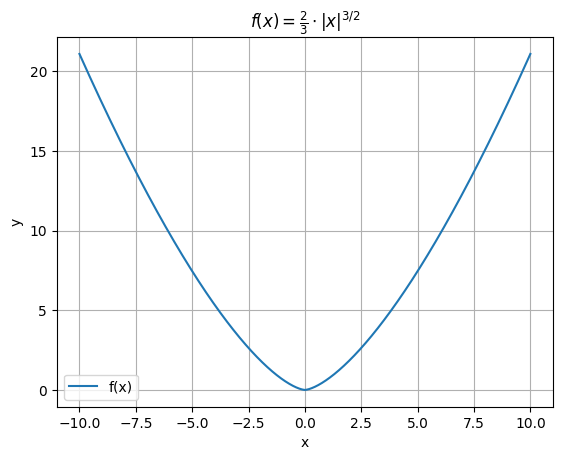

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def my_function(x):
    return (2/3) * np.abs(x)**(3/2)

# Generate x values
x_values = np.linspace(-10, 10, 1000)

# Calculate corresponding y values
y_values = my_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label=r'f(x)')
plt.title(label=r'$f(x)=\frac{2}{3} \cdot |x|^{3/2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


x0: -0.015157614396996033
-----------------------------------
x_0: -0.015157614396996033, Alpha: 0.24723252747755348, grad_0: -0.12311626373877675, grad_x: -0.12311626373877675
-----------------------------------
alpha       15.245
x*          58.104
f*(x)      295.267
k        15001.000
log_f        5.688
Name: 15000, dtype: float64


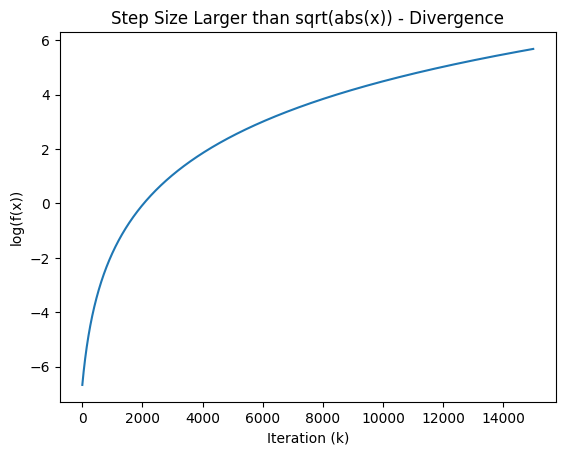

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import pandas as pd

#Supress future warnings related to pandas dataframe.append
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the function to be minimized (a simple quadratic function)
def f(x):
    return 2/3 * np.abs(x) ** (3/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x):
  if x != 0:
    return x/np.sqrt(np.abs(x))
  else:
    return 0

# Define the gradient descent algorithm
def gradient_descent(x_0, k_max):
    # Initialize the parameters
    x = x_0
    epsilon = 1e-3

    #Step size larger than 2 sqrt(abs(x))
    alpha = 2*np.sqrt(np.abs(x)) + epsilon
    k = 0

    if factor == 10: #To avoid overflow errors
      k_max = 150

    grad_0 = df_dx(x_0)
    grad_x = df_dx(x)

    print('-----------------------------------')
    print('x_0: %s, Alpha: %s, grad_0: %s, grad_x: %s' %(x, alpha, grad_0, grad_x))
    print('-----------------------------------')

    norm = np.linalg.norm([grad_x])

    # Create an empty DataFrame to store the iteration information
    columns = ['alpha', 'x*', 'f*(x)','k', 'log_f']
    df = pd.DataFrame(columns=columns)

    # Perform the gradient descent iterations
    while k <= k_max :
        # Calculate the gradients
        grad_x = df_dx(x)
        alpha = 2*np.sqrt(np.abs(x)) + epsilon

        # Update the parameters
        x = x - alpha * grad_x
        k += 1
        norm = np.linalg.norm([grad_x])

        # Save the history of the parameters
        # history.append((L, factor, alpha, x, y, f(x, y, L), k))

        df = df.append({'alpha': alpha, 'x*': x, 'f*(x)': f(x), 'k': k, 'log_f': np.log(f(x))}, ignore_index=True)

    return df



# Define the meshgrid for plotting the function
x_range = np.arange(-1, 1, 0.01)
X = np.meshgrid(x_range)
L = [10, 100, 1000]
factors = [1, 0.1, 0.01, 10]
# Perform gradient descent and plot the results
start_x = np.random.uniform(-1, 1)
print('x0: %s' % start_x)
alpha = 0.1
epsilon = 10 ** (-3)
k_max = 15000


np.seterr(divide = 'ignore')

df = gradient_descent(start_x, k_max)

with pd.option_context('display.max_rows', None,
                'display.max_columns', None,
                'display.precision', 3,
                ):
  print(df.iloc[-1])


# Plot the values of 'k' against 'log_f'
plt.plot(df['k'], df['log_f'])
plt.title('Step Size Larger than sqrt(abs(x)) - Divergence')
plt.xlabel('Iteration (k)')
plt.ylabel('log(f(x))')
plt.show()

np.seterr(divide = 'warn')


x0: -0.022919972011729683
-----------------------------------
x_0: -0.022919972011729683, Alpha: 0.30178686901336843, grad_0: -0.15139343450668422, grad_x: -0.15139343450668422
-----------------------------------
alpha    0.000e+00
x*       2.500e-07
f*(x)    8.333e-11
k        1.500e+04
log_f   -2.321e+01
Name: 15000, dtype: float64


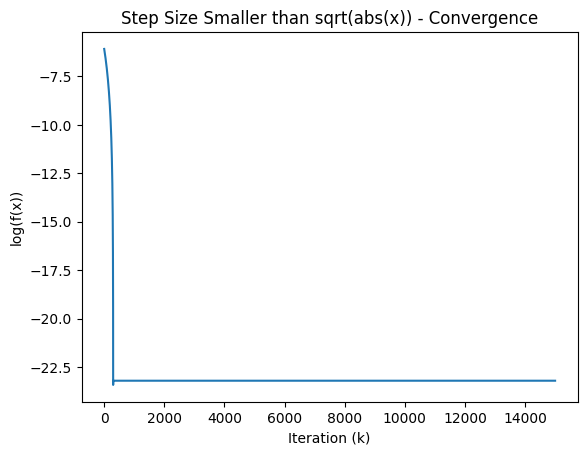

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import pandas as pd

#Supress future warnings related to pandas dataframe.append
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the function to be minimized (a simple quadratic function)
def f(x):
    return 2/3 * np.abs(x) ** (3/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x):
  if x != 0:
    return x/np.sqrt(np.abs(x))
  else:
    return 0

# Define the gradient descent algorithm
def gradient_descent(x_0, k_max):
    # Initialize the parameters
    x = x_0
    epsilon = 1e-3

    #Step size larger than 2 sqrt(abs(x))
    alpha = 2*np.sqrt(np.abs(x)) - epsilon
    k = 0

    if factor == 10: #To avoid overflow errors
      k_max = 150

    grad_0 = df_dx(x_0)
    grad_x = df_dx(x)

    print('-----------------------------------')
    print('x_0: %s, Alpha: %s, grad_0: %s, grad_x: %s' %(x, alpha, grad_0, grad_x))
    print('-----------------------------------')

    norm = np.linalg.norm([grad_x])

    # Create an empty DataFrame to store the iteration information
    columns = ['alpha', 'x*', 'f*(x)','k', 'log_f']
    df = pd.DataFrame(columns=columns)

    # Perform the gradient descent iterations
    while k <= k_max :
        # Calculate the gradients
        grad_x = df_dx(x)
        alpha = 2*np.sqrt(np.abs(x)) - epsilon

        # Update the parameters
        x = x - alpha * grad_x
        k += 1
        norm = np.linalg.norm([grad_x])

        # Save the history of the parameters
        # history.append((L, factor, alpha, x, y, f(x, y, L), k))

        df = df.append({'alpha': alpha, 'x*': x, 'f*(x)': f(x), 'k': k, 'log_f': np.log(f(x))}, ignore_index=True)

    return df



# Define the meshgrid for plotting the function
x_range = np.arange(-1, 1, 0.01)
X = np.meshgrid(x_range)
L = [10, 100, 1000]
factors = [1, 0.1, 0.01, 10]
# Perform gradient descent and plot the results
start_x = np.random.uniform(-1, 1)
print('x0: %s' % start_x)
alpha = 0.1
epsilon = 10 ** (-3)
k_max = 15000


np.seterr(divide = 'ignore')

df = gradient_descent(start_x, k_max)

with pd.option_context('display.max_rows', None,
                'display.max_columns', None,
                'display.precision', 3,
                ):
  print(df.iloc[-1])


# Plot the values of 'k' against 'log_f'
plt.plot(df['k'], df['log_f'])
plt.title('Step Size Smaller than sqrt(abs(x)) - Convergence')
plt.xlabel('Iteration (k)')
plt.ylabel('log(f(x))')
plt.show()

np.seterr(divide = 'warn')


In [54]:
!jupyter nbconvert --to html /content/ORIE5300_Assignment8_lc2234.ipynb

[NbConvertApp] Converting notebook /content/ORIE5300_Assignment8_lc2234.ipynb to html
[NbConvertApp] Writing 1064859 bytes to /content/ORIE5300_Assignment8_lc2234.html
